## Homework by MM7305

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\lenovo\\Documents\\GitHub\\DS601_Spring21-main\\DS601_Spring21-main\\Week5\\cleaned_history_files\\cleaned_history_files\\history_cleaned-5.csv')
df.shape

(11967, 2)

In [3]:
df.head()

,Time,domain
0,2021-02-19 00:11:03,github.com
1,2021-02-19 00:11:02,github.com
2,2021-02-19 00:10:57,github.com
3,2021-02-19 00:09:09,github.com
4,2021-02-19 00:08:53,github.com


In [4]:
df.tail()

,Time,domain
11962,1600-12-31 19:00:00,www.khanacademy.org
11963,1600-12-31 19:00:00,stanford.edu
11964,1600-12-31 19:00:00,extensiongallery.tableau.com
11965,1600-12-31 19:00:00,www.facebook.com
11966,1600-12-31 19:00:00,www.airbnb.co.in


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 


28

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.instagram.com                     2229
www.google.com                        1585
www.youtube.com                        873
www.amazon.com                         445
mail.google.com                        443
www.facebook.com                       345
webauth.umbc.edu                       304
stackoverflow.com                      303
blackboard.umbc.edu                    300
www.amazon.in                          296
github.com                             207
www.securitylearningacademy.com        152
www.hackerrank.com                     150
colab.research.google.com              128
www.netflix.com                        111
accounts.google.com                    102
www.linkedin.com                        98
docs.google.com                         85
csprd-web.ps.umbc.edu                   74
piazza.com                              73
my.umbc.edu                             71
www.kaggle.com                          70
drive.google.com                        66
www.geeksfo

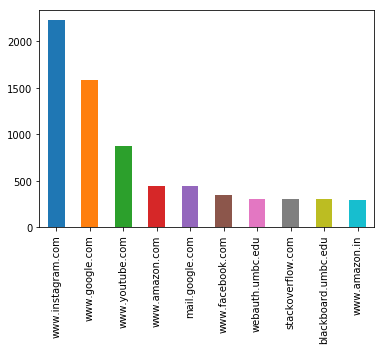

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      700
1      449
2      263
3      183
4      198
5      145
6      211
7      297
8      592
9      547
10     856
11    1148
12     932
13     893
14     572
15     455
16     519
17     310
18     476
19     454
20     383
21     136
22     438
23     782
Name: domain, dtype: int64

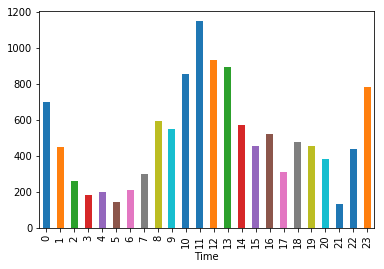

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-19 00:11:03,github.com,Friday,4
1,2021-02-19 00:11:02,github.com,Friday,4
2,2021-02-19 00:10:57,github.com,Friday,4
3,2021-02-19 00:09:09,github.com,Friday,4
4,2021-02-19 00:08:53,github.com,Friday,4


In [14]:
df['Day'].value_counts()

Thursday     2073
Tuesday      1914
Saturday     1741
Monday       1687
Friday       1558
Wednesday    1536
Sunday       1430
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1687
1    1914
2    1536
3    2073
4    1558
5    1741
6    1430
Name: DayIndex, dtype: int64

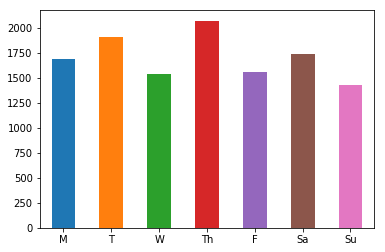

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-19 00:11:03,github.com,Friday,4,False
1,2021-02-19 00:11:02,github.com,Friday,4,False
2,2021-02-19 00:10:57,github.com,Friday,4,False
3,2021-02-19 00:09:09,github.com,Friday,4,False
4,2021-02-19 00:08:53,github.com,Friday,4,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
735,2021-02-14 23:48:35,www.amazon.com,Sunday,6,True
736,2021-02-14 23:48:15,www.amazon.com,Sunday,6,True
737,2021-02-14 23:48:01,www.amazon.com,Sunday,6,True
738,2021-02-14 23:47:59,www.amazon.com,Sunday,6,True
739,2021-02-14 23:41:44,docs.google.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.instagram.com    1399
www.google.com       1152
www.youtube.com       623
mail.google.com       397
www.amazon.com        367
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.instagram.com    830
www.google.com       433
www.youtube.com      250
stackoverflow.com     96
www.amazon.in         85
Name: domain, dtype: int64

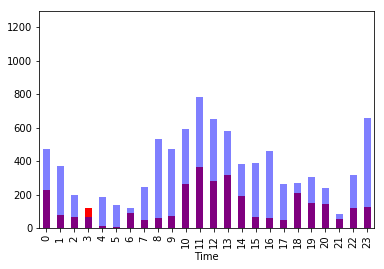

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

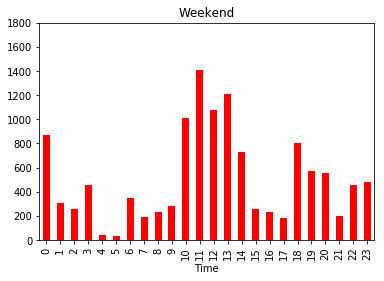

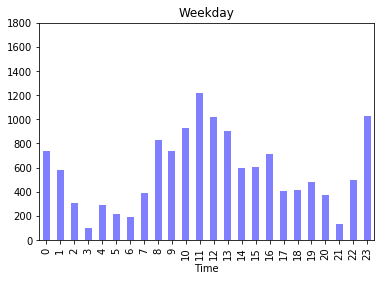

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.instagram.com                     2229
www.google.com                        1585
www.youtube.com                        873
www.amazon.com                         445
mail.google.com                        443
www.facebook.com                       345
webauth.umbc.edu                       304
stackoverflow.com                      303
blackboard.umbc.edu                    300
www.amazon.in                          296
github.com                             207
www.securitylearningacademy.com        152
www.hackerrank.com                     150
colab.research.google.com              128
www.netflix.com                        111
accounts.google.com                    102
www.linkedin.com                        98
docs.google.com                         85
csprd-web.ps.umbc.edu                   74
piazza.com                              73
my.umbc.edu                             71
www.kaggle.com                          70
drive.google.com                        66
www.geeksfo

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

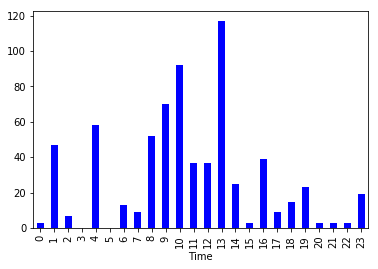

In [28]:
_= show_domain_stats('facebook', 'blue')

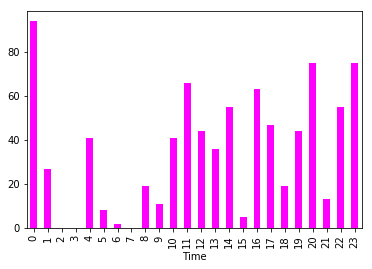

In [29]:
_ = show_domain_stats('stackover', 'magenta')


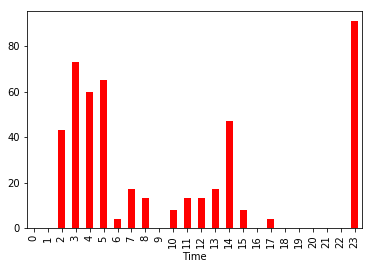

In [30]:
_ = show_domain_stats('netflix', 'red')


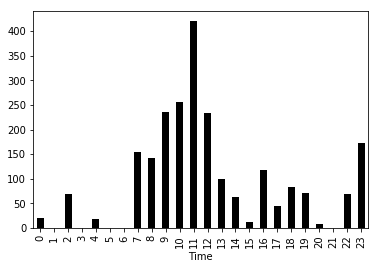

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
##### Personal computer.
1. Is s/he employed?
##### Is a student of UMBC and is unemployed
1. What are his/her interests?
##### this person is student who has interest in analyical field as I can observe stackoverflow,kaggle, analyticalvidya and student  community websites.
1. List any interesting findings
##### This person is very active in social media platforms - Instagram, Facebook, who often shop at amazon during day time. 
##### However, spends more time at midnight watching netflix,voot,prime vedio streaming platforms. 
##### This individual probably might have account at PNC bank

answer here